In [127]:
import pandas as pd
df=pd.read_csv(r"C:\Users\Sitanshu Sahu\Downloads\education_news.csv")
print(df)

      Unnamed: 0             published_date            author  \
0            109  2025-05-20T19:49:48+05:30    Education Desk   
1            110  2025-05-20T19:49:40+05:30    Education Desk   
2            111  2025-05-20T07:24:09+05:30    Education Desk   
3            112  2025-05-20T13:32:14+05:30    Education Desk   
4            113  2025-05-20T19:37:46+05:30    Education Desk   
...          ...                        ...               ...   
4995       64597     2025-09-06 05:51:00+00  Author Not Found   
4996       64786     2025-09-06 06:59:00+00  Author not found   
4997       64787     2025-09-06 09:55:00+00  Author not found   
4998       64788     2025-09-06 06:12:00+00  Author not found   
4999       64789     2025-09-06 13:00:00+00    Apeksha Tanwar   

                location                                            heading  \
0              New Delhi  IIM Kozhikode terminates agreement with Turkey...   
1              New Delhi  IISc Bangalore revises GATE COAP sc

i got few problem in the dataset.
1. unnamed column has no meaning
2. published data is not in standat formate 
3. due to unnecessay spacing two same entity treated differently 
4. if some data is not mention so here they write f"column_name not mention"
5. their are many place where their is no content in news
6. some sontent are duplicate to each other , so we have to remove them 
7. thier is only one row where all data is not found so i have ot delet that one.
8. their are few location name which is miss written like new delhi or delhi or dlhi od new dlhi we have to handle this all.
9. news per day 
10. period wise analyis 
11. use heading word for finding the trending words.
12. find most frequent word using heading.

In [128]:
df.head(5)

,Unnamed: 0,published_date,author,location,heading,subheading,content
0,109,2025-05-20T19:49:48+05:30,Education Desk,New Delhi,IIM Kozhikode terminates agreement with Turkey...,IIM Kozhikode has also communicated this decis...,The Indian Institute of Management Kozhikode (...
1,110,2025-05-20T19:49:40+05:30,Education Desk,New Delhi,IISc Bangalore revises GATE COAP schedule for ...,GATE COAP Schedule 2025: The GATE COAP 2025 Ro...,GATE COAP Schedule 2025: The Indian Institute ...
2,111,2025-05-20T07:24:09+05:30,Education Desk,New Delhi,IIM Sambalpur launches UG programmes in Public...,IIM Sambalpur has launched its two new undergr...,IIM Sambalpur has launched its two new undergr...
3,112,2025-05-20T13:32:14+05:30,Education Desk,New Delhi,"NEET Result 2025: Expected cut-off, and what s...",NEET MBBS Cut Off 2025 Marks: The NEET UG cut-...,"NEET Expected Cutoff Marks 2025 For MBBS, BDS,..."
4,113,2025-05-20T19:37:46+05:30,Education Desk,New Delhi,SAMS Odisha +3 Admissions: Deadline for UG cou...,The timeline for e-Admission into all (+3) Deg...,The Odisha government on Tuesday extended the ...


# what analyis we can do , or what question we can think off 
0. check missing values and NaN values or any kind.
1. which author is more popular.
2. from which loacation news are published more(or which location is more active in educational purpose)
3. largest content leangth and smallest content length
4. we also have to check which author gives news in good and formatical manner , beacuse most of the author not gives contetn just provide news heading.
5. we can also check which word is more frequently used.
6. we can find the unique word on it and do NER on it.
7. sentiment analysis or emotion analysis.

In [129]:
print(df.count())

Unnamed: 0        5000
published_date    5000
author            5000
location          5000
heading           5000
subheading        5000
content           5000
dtype: int64


# missing or NAN finding

In [113]:
! pip install missingno 

Defaulting to user installation because normal site-packages is not writeable


<Axes: >

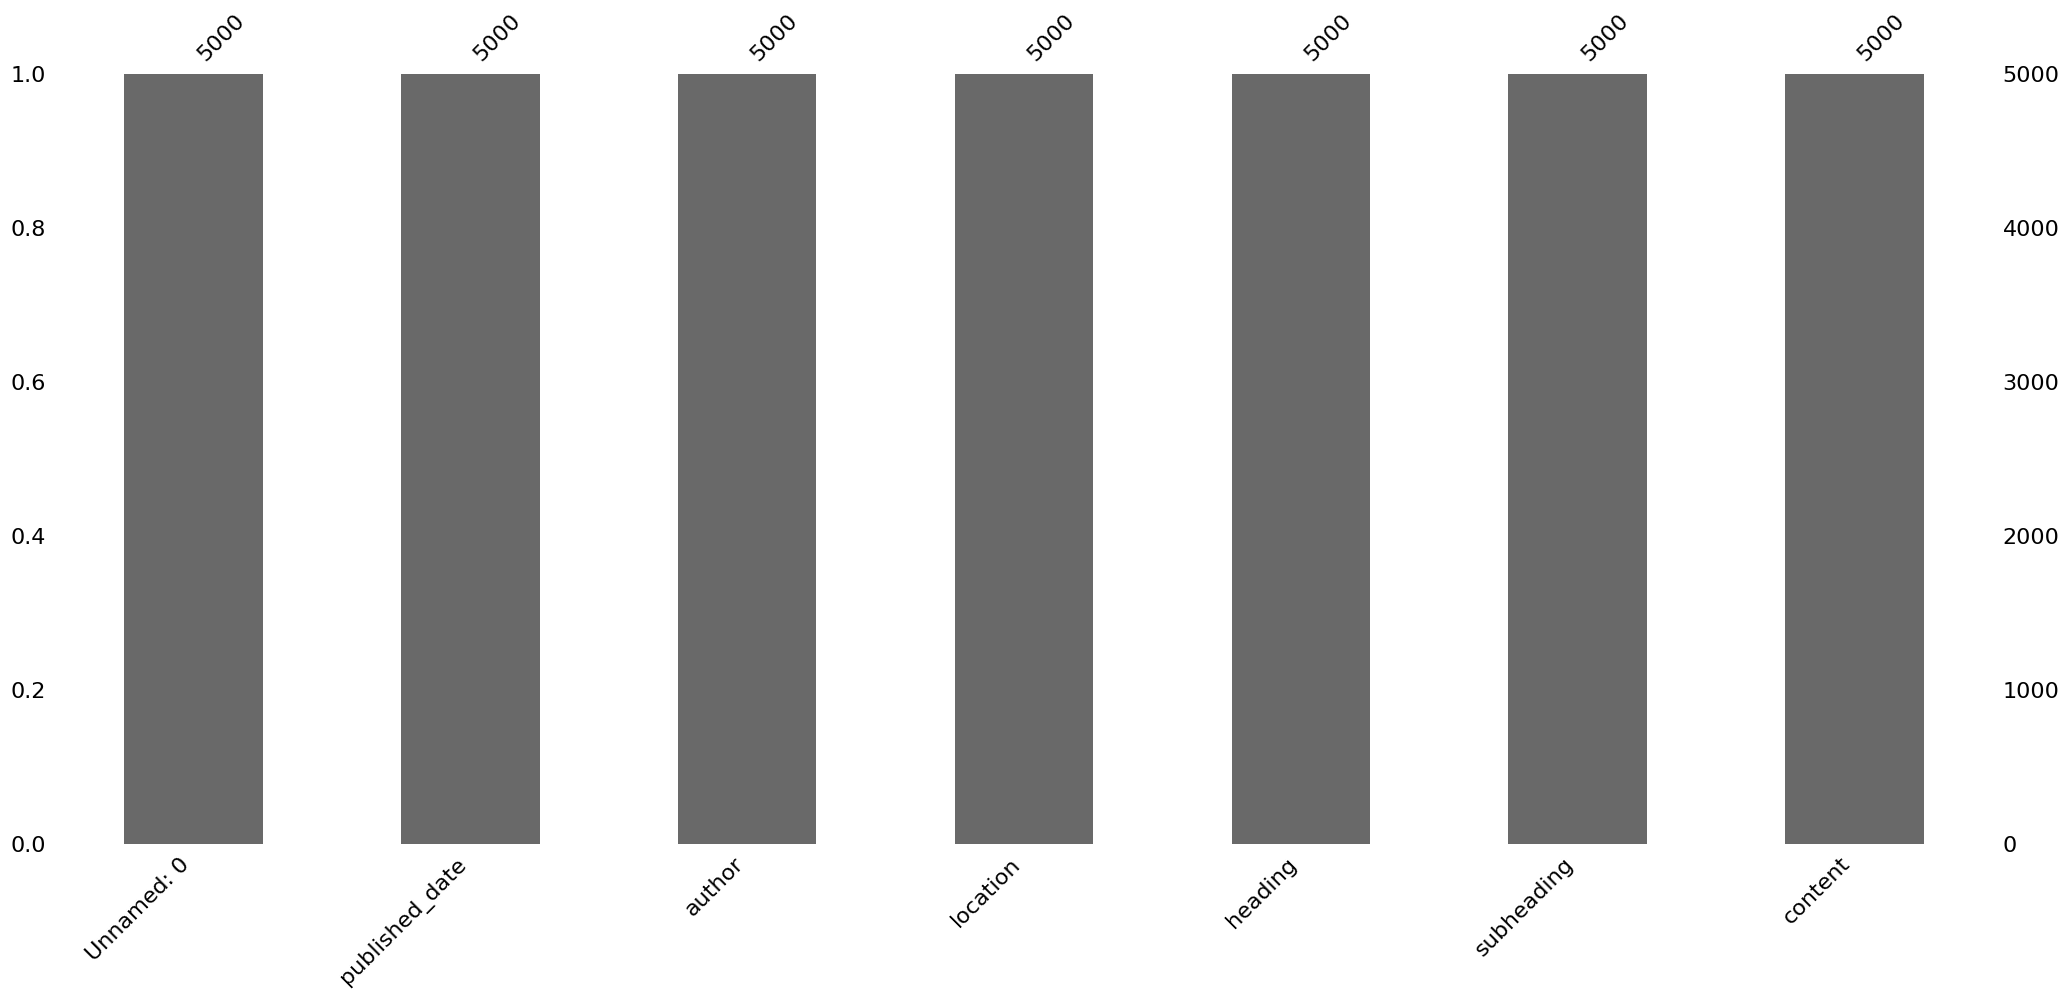

In [130]:
import missingno as msno
msno.bar(df)

it shows that their is no missing values 

In [131]:
df['author'].value_counts().head(15)

author
Author not found              1181
Education and Careers Desk    1091
Education Desk                 838
Sanjay Sharma                  423
PTI                            174
The Hindu Bureau               134
Lakshima Sareen                121
Apeksha Tanwar                 114
Author Not Found                65
Anjali Mittal                   62
Archit Gupta                    37
Sameeksha Sharma                37
Trisha Tewari                   36
Parishmita Saikia               26
Education Plus Team             25
Name: count, dtype: int64

here we see that 'Author not found" and Author not Found" is treated as different different entity , so we have to convert all dat in author column in to lowercase.

In [ ]:
# i use strip because in location column based on space our python treat them different
df['author']=df['author'].str.lower().str.replace(r"\s+"," ",regex=True).str.strip()
df['author'].value_counts()

author
author not found              1246
education and careers desk    1091
education desk                 838
sanjay sharma                  423
pti                            174
                              ... 
mayank kumar                     1
b. kolappan                      1
manisha roy                      1
devyanshi  bihani,               1
s.  armstrong                    1
Name: count, Length: 245, dtype: int64

1. we seen that their are 1246 news where author name is not mentioned
2. top 5 those who publish news are see in the output.


now we have to check whiich location is publishing more scientific news.

In [133]:
df['location']=df['location'].str.lower().str.replace("[:,]"," ",regex=True)
df['location']=df['location'].str.replace("india"," ",regex=False).str.replace(r"\s+", " ", regex=True).str.strip()
df['location'].value_counts()

location
location not found         2674
new delhi                  2187
mumbai                       24
chennai                      21
bengaluru                    14
kolkata                      13
thiruvananthapuram            8
hyderabad                     7
vijayawada                    7
bhubaneswar                   4
mysuru                        3
guwahati                      3
jaipur                        3
pune                          3
lucknow                       3
new dlehi                     2
tiruchi                       2
madurai                       2
san francisco                 2
una                           1
shimla                        1
new york                      1
visakhapatnam                 1
coimbatore                    1
alappuzha                     1
shivamogga                    1
new dlhi                      1
srinagar                      1
chandigarh                    1
patna                         1
nuzvid (eluru district)       1

we got that their are 2674 news which is not area specific.
# also we see that 'new delhi' " new delhi india" etc treacted as different 
so we have to remove extre space and also we have to remove  india or any symbols from the data 

In [134]:
df[["heading","subheading","content"]]=df[["heading","subheading","content"]].apply(lambda x: x.str.lower())

In [135]:
df

,Unnamed: 0,published_date,author,location,heading,subheading,content
0,109,2025-05-20T19:49:48+05:30,education desk,new delhi,iim kozhikode terminates agreement with turkey...,iim kozhikode has also communicated this decis...,the indian institute of management kozhikode (...
1,110,2025-05-20T19:49:40+05:30,education desk,new delhi,iisc bangalore revises gate coap schedule for ...,gate coap schedule 2025: the gate coap 2025 ro...,gate coap schedule 2025: the indian institute ...
2,111,2025-05-20T07:24:09+05:30,education desk,new delhi,iim sambalpur launches ug programmes in public...,iim sambalpur has launched its two new undergr...,iim sambalpur has launched its two new undergr...
3,112,2025-05-20T13:32:14+05:30,education desk,new delhi,"neet result 2025: expected cut-off, and what s...",neet mbbs cut off 2025 marks: the neet ug cut-...,"neet expected cutoff marks 2025 for mbbs, bds,..."
4,113,2025-05-20T19:37:46+05:30,education desk,new delhi,sams odisha +3 admissions: deadline for ug cou...,the timeline for e-admission into all (+3) deg...,the odisha government on tuesday extended the ...
...,...,...,...,...,...,...,...
4995,64597,2025-09-06 05:51:00+00,author not found,kolkata,"among state public universities, bengal’s jada...","visva-bharati, the only central university in ...",content not found
4996,64786,2025-09-06 06:59:00+00,author not found,location not found,cbse launches integrated payment system for cl...,subheading not found,the central board of secondary education (cbse...
4997,64787,2025-09-06 09:55:00+00,author not found,location not found,jkset 2025: exam to be held on september 7 as ...,subheading not found,the university of jammu has confirmed that the...
4998,64788,2025-09-06 06:12:00+00,author not found,location not found,rajasthan neet ug counselling round 2 registra...,subheading not found,rajasthan neet ug counselling 2025 : the rajas...


In [136]:
df['heading'].value_counts() # heading is every where 

heading
ireland solidifies spot as leading hub for international students after brexit                                             2
bihar board class 10th result 2025: bseb matric results to be declared tomorrow at 12 pm – how to check                    2
the real challenges of foreign campuses\npremium                                                                           2
from kashmir to iits: meet the girls who cracked jee advanced 2025\npremium                                                2
what the world wants to study: 10 in-demand degrees for higher education worldwide                                         2
                                                                                                                          ..
among state public universities, bengal’s jadavpur is no. 1 this year in nirf                                              1
cbse launches integrated payment system for class 12 practicals, holds principals liable for errors: check details he

# question 3 largest content leangth and smallest content length

In [137]:
print("content min length",df['content'].str.split().str.len().min())
print("heading min length",df['heading'].str.split().str.len().min())
print("subheading min length",df['subheading'].str.split().str.len().min())

print("content max len",df['content'].str.split().str.len().max())
print("heading max len",df['heading'].str.split().str.len().max())
print("subheading max len",df['subheading'].str.split().str.len().max())

content min length 3
heading min length 3
subheading min length 2
content max len 3996
heading max len 27
subheading max len 76


their are two type of replace function 

1 pandas (support regex pattern) series.str.replace()

2 python (not support regex pattern) str.replace()

3 re.sub() is regexx supported but apply on single string


In [ ]:
# we have to remove unnecessary space from heading , subheading, content
df[["heading","subheading","content"]]=df[["heading","subheading","content"]].apply(lambda x: x.str.replace(r"\s+", " ", regex=True).str.strip())

In [ ]:
# i want to find rows where author is not found , loaction is not found and no content in news
# where heading and content is not their or sunheading and content is not their 
import numpy as np
df.replace(["location not found", "author not found", "content not found", "subheading not found", "", "NA", "null","heading not found"],np.nan,inplace=True)


In [146]:
df

,Unnamed: 0,published_date,author,location,heading,subheading,content
0,109,2025-05-20 14:19:48+00:00,education desk,new delhi,iim kozhikode terminates agreement with turkey...,iim kozhikode has also communicated this decis...,the indian institute of management kozhikode (...
1,110,2025-05-20 14:19:40+00:00,education desk,new delhi,iisc bangalore revises gate coap schedule for ...,gate coap schedule 2025: the gate coap 2025 ro...,gate coap schedule 2025: the indian institute ...
2,111,2025-05-20 01:54:09+00:00,education desk,new delhi,iim sambalpur launches ug programmes in public...,iim sambalpur has launched its two new undergr...,iim sambalpur has launched its two new undergr...
3,112,2025-05-20 08:02:14+00:00,education desk,new delhi,"neet result 2025: expected cut-off, and what s...",neet mbbs cut off 2025 marks: the neet ug cut-...,"neet expected cutoff marks 2025 for mbbs, bds,..."
4,113,2025-05-20 14:07:46+00:00,education desk,new delhi,sams odisha +3 admissions: deadline for ug cou...,the timeline for e-admission into all (+3) deg...,the odisha government on tuesday extended the ...
...,...,...,...,...,...,...,...
4995,64597,2025-09-06 05:51:00+00:00,NaN,kolkata,"among state public universities, bengal’s jada...","visva-bharati, the only central university in ...",NaN
4996,64786,2025-09-06 06:59:00+00:00,NaN,NaN,cbse launches integrated payment system for cl...,NaN,the central board of secondary education (cbse...
4997,64787,2025-09-06 09:55:00+00:00,NaN,NaN,jkset 2025: exam to be held on september 7 as ...,NaN,the university of jammu has confirmed that the...
4998,64788,2025-09-06 06:12:00+00:00,NaN,NaN,rajasthan neet ug counselling round 2 registra...,NaN,rajasthan neet ug counselling 2025 : the rajas...


# published date is not in formate , this column is mixer of string and datetime data so we have to make it standard.

In [ ]:
from dateutil import parser
import re

TZINFOS = {"ist": 5.5 * 3600}  # seconds (+05:30)

def parse_any_date(x):

    #handling null values in our column x
    if pd.isna(x):
        return pd.NaT

    #we have to convert al thinginto text because my data contain mixer of datatypes
    x = str(x).strip().lower()

    # here i have to mainly replace thoce values where data is either not avalablie or no found
    if x in ['date and time not found', 'not found', 'none', '']:
        return pd.NaT

    # i my data i saw some place value is like "updated: 20 may 2025" so i have to remove this types of text also
    #^ means starting os string \s* means any space after it replace with nothing
    # i use sub intead of replace beacuse replace is use for whole column where as sub is used for single string
    x = re.sub(r'\b(today|yesterday|tonight|tomorrow)\b', '', x)
    x = re.sub(r'\s+', ' ', x)


    # i have to replace any extra space between the dates 
    x = re.sub(r'\s+', ' ', x)

    # fix the invalid pm am cases
    # examples:
    # 17 pm → 17:00
    # 17:06 pm → 17:06
    # it not hanlde 9.00 pm / 7pm they are handles by parser
    # Normalize dot-based times: 9.30 am → 9:30 am
    x = re.sub(r'(\d{1,2})\.(\d{2})', r'\1:\2', x)

    # Fix invalid AM cases (13–23 am)
    # m is the match object it stores the part which is captured by regex
    x = re.sub( r'\b(1[3-9]|2[0-3])(?::(\d{2}))?\s*am\b',lambda m: f"{m.group(1)}:{m.group(2) or '00'}",x)

    # Fix invalid PM cases (13–23 pm)
    x = re.sub(r'\b(1[3-9]|2[0-3])(?::(\d{2}))?\s*pm\b',lambda m: f"{m.group(1)}:{m.group(2) or '00'}",x)


    try:
        #Parse most of the datetime formate 
        dt = parser.parse(x,fuzzy=True,tzinfos=TZINFOS) # fuzzy = ture mans it egnore extra words
        # dt is datetime object (x = "20 may 2025 10:30" then dt=2025-05-20 10:30:00+05:30)


        #Normalize to UTC
        if dt.tzinfo is None: # dt.tzifo tell sue is dt contain timezone info or not
            return pd.Timestamp(dt).tz_localize('UTC')
        return pd.Timestamp(dt).tz_convert('UTC') #10:30 IST become 05:00 UTC

    except Exception:
        return pd.NaT


In [ ]:
df['published_date'] = df['published_date'].apply(parse_any_date)


In [143]:
df['published_date'].isna().value_counts()

published_date
False    4995
True        5
Name: count, dtype: int64

In [147]:
df[df['published_date'].isna()]

,Unnamed: 0,published_date,author,location,heading,subheading,content
28,214,NaT,NaN,NaN,upsc cse prelims 2025 live updates: exam on ma...,upsc cse prelims 2025 live updates: the exam c...,upsc cse prelims 2025 live updates: the union ...
323,2469,NaT,NaN,NaN,rajasthan class 12 result live: result to be d...,rajasthan board class 12 result live updates: ...,rajasthan board 12 results live updates: the r...
351,2867,NaT,NaN,NaN,kerala plus two result 2025 (out) live: 77.81%...,dhse kerala plus two result 2025 live updates:...,plus two result 2025 kerala live: the results ...
524,5022,NaT,NaN,NaN,upsc cse prelims 2025 live updates: check key ...,upsc cse prelims 2025: the exam centre will cl...,upsc cse prelims 2025 live updates: the union ...
3645,46947,NaT,NaN,NaN,NaN,NaN,NaN


In [148]:
df["published_date"].value_counts()

published_date
2025-06-24 06:02:00+00:00    3
2025-06-25 06:42:00+00:00    3
2025-08-01 11:45:00+00:00    3
2025-08-16 09:00:00+00:00    3
2025-05-21 18:38:00+00:00    2
                            ..
2025-09-06 05:51:00+00:00    1
2025-09-06 06:59:00+00:00    1
2025-09-06 09:55:00+00:00    1
2025-09-06 06:12:00+00:00    1
2025-05-20 08:02:14+00:00    1
Name: count, Length: 4872, dtype: int64

<Axes: >

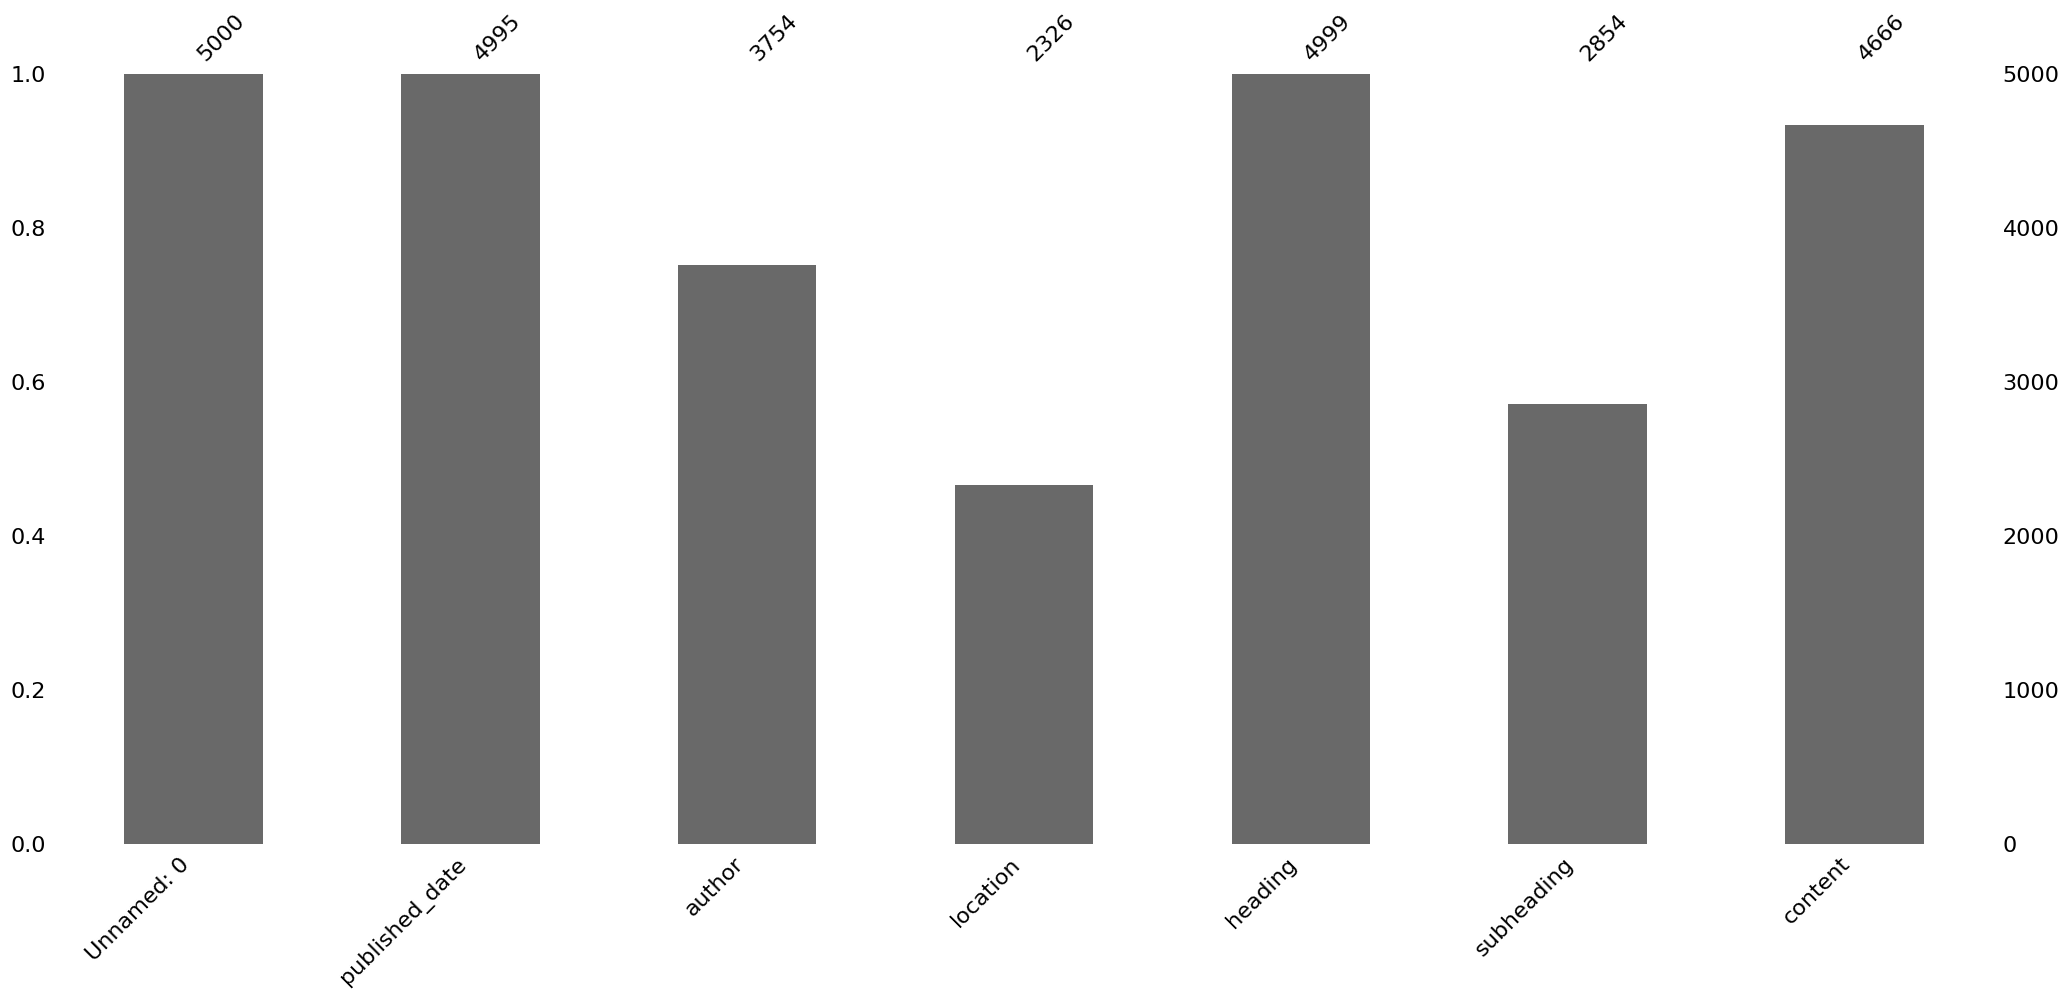

In [149]:
import missingno as msno
msno.bar(df)

now i remove those row where no content and subheading because only heading can't provide enought news

In [151]:
df[df[['subheading', 'content']].isna().all(axis=1)]


,Unnamed: 0,published_date,author,location,heading,subheading,content
1959,23825,2025-06-20 13:25:00+00:00,deepankur bansal,NaN,creating a childhood free from academic pressure,NaN,NaN
1960,23826,2025-06-20 13:54:00+00:00,ravina warkad,NaN,"beyond heart lamp’s success, translators are s...",NaN,NaN
1961,23827,2025-06-20 13:23:00+00:00,pti,NaN,"iit kharagpur ranks 4th in india, climbs to 21...",NaN,NaN
2021,25090,2025-06-23 01:46:00+00:00,ashna butani,new delhi,mother tongue mapping in delhi-ncr schools rev...,NaN,NaN
2040,25465,2025-06-23 12:34:00+00:00,pti,NaN,"after mizoram and goa, tripura declared third ...",NaN,NaN
...,...,...,...,...,...,...,...
4897,63461,2025-09-04 13:49:00+00:00,the hindu bureau,NaN,nirf 2025: doctoral qualifications concentrate...,NaN,NaN
4899,63463,2025-09-05 01:31:00+00:00,the hindu bureau,new delhi,"nirf rankings: du, jnu, jamia millia in top 5 ...",NaN,NaN
4940,63907,2025-09-05 10:45:00+00:00,the hindu bureau,NaN,"beyond rules, seeing the human behind the stud...",NaN,NaN
4962,64268,2025-09-05 14:01:00+00:00,nibedita sen,NaN,colleges reshape sehore belt in madhya pradesh...,NaN,NaN


In [153]:
df_imp = df.dropna(subset=['subheading', 'content'], how='all')



In [152]:
df_imp = df.dropna(subset=['subheading', 'content','author','heading','location'], how='all')

In [154]:
df_imp

,Unnamed: 0,published_date,author,location,heading,subheading,content
0,109,2025-05-20 14:19:48+00:00,education desk,new delhi,iim kozhikode terminates agreement with turkey...,iim kozhikode has also communicated this decis...,the indian institute of management kozhikode (...
1,110,2025-05-20 14:19:40+00:00,education desk,new delhi,iisc bangalore revises gate coap schedule for ...,gate coap schedule 2025: the gate coap 2025 ro...,gate coap schedule 2025: the indian institute ...
2,111,2025-05-20 01:54:09+00:00,education desk,new delhi,iim sambalpur launches ug programmes in public...,iim sambalpur has launched its two new undergr...,iim sambalpur has launched its two new undergr...
3,112,2025-05-20 08:02:14+00:00,education desk,new delhi,"neet result 2025: expected cut-off, and what s...",neet mbbs cut off 2025 marks: the neet ug cut-...,"neet expected cutoff marks 2025 for mbbs, bds,..."
4,113,2025-05-20 14:07:46+00:00,education desk,new delhi,sams odisha +3 admissions: deadline for ug cou...,the timeline for e-admission into all (+3) deg...,the odisha government on tuesday extended the ...
...,...,...,...,...,...,...,...
4995,64597,2025-09-06 05:51:00+00:00,NaN,kolkata,"among state public universities, bengal’s jada...","visva-bharati, the only central university in ...",NaN
4996,64786,2025-09-06 06:59:00+00:00,NaN,NaN,cbse launches integrated payment system for cl...,NaN,the central board of secondary education (cbse...
4997,64787,2025-09-06 09:55:00+00:00,NaN,NaN,jkset 2025: exam to be held on september 7 as ...,NaN,the university of jammu has confirmed that the...
4998,64788,2025-09-06 06:12:00+00:00,NaN,NaN,rajasthan neet ug counselling round 2 registra...,NaN,rajasthan neet ug counselling 2025 : the rajas...


In [155]:
df_imp['content'].value_counts() # ther are many news which is duplicatied so we have to remove all those news which is duplicated 

content
disclaimer: this column is merely a guiding voice and provides advice and suggestions on education and careers. the writer is a practising counsellor and a trainer. send your questions to eduplus.thehindu@gmail.com with the subject line off the edge                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                       

In [156]:
df_imp = df_imp.drop_duplicates(subset='content', keep='first')


In [157]:
df_imp # i remove all those row where content is same but not kept all nan rows

,Unnamed: 0,published_date,author,location,heading,subheading,content
0,109,2025-05-20 14:19:48+00:00,education desk,new delhi,iim kozhikode terminates agreement with turkey...,iim kozhikode has also communicated this decis...,the indian institute of management kozhikode (...
1,110,2025-05-20 14:19:40+00:00,education desk,new delhi,iisc bangalore revises gate coap schedule for ...,gate coap schedule 2025: the gate coap 2025 ro...,gate coap schedule 2025: the indian institute ...
2,111,2025-05-20 01:54:09+00:00,education desk,new delhi,iim sambalpur launches ug programmes in public...,iim sambalpur has launched its two new undergr...,iim sambalpur has launched its two new undergr...
3,112,2025-05-20 08:02:14+00:00,education desk,new delhi,"neet result 2025: expected cut-off, and what s...",neet mbbs cut off 2025 marks: the neet ug cut-...,"neet expected cutoff marks 2025 for mbbs, bds,..."
4,113,2025-05-20 14:07:46+00:00,education desk,new delhi,sams odisha +3 admissions: deadline for ug cou...,the timeline for e-admission into all (+3) deg...,the odisha government on tuesday extended the ...
...,...,...,...,...,...,...,...
4993,64553,2025-09-06 04:27:00+00:00,sukanya nandy,NaN,"jammu schools, closed due to floods, directed ...",schools in jammu have remained closed for the ...,the directorate of school education jammu has ...
4996,64786,2025-09-06 06:59:00+00:00,NaN,NaN,cbse launches integrated payment system for cl...,NaN,the central board of secondary education (cbse...
4997,64787,2025-09-06 09:55:00+00:00,NaN,NaN,jkset 2025: exam to be held on september 7 as ...,NaN,the university of jammu has confirmed that the...
4998,64788,2025-09-06 06:12:00+00:00,NaN,NaN,rajasthan neet ug counselling round 2 registra...,NaN,rajasthan neet ug counselling 2025 : the rajas...


# df_imp is our data where we have unique content and their is no row where subheading and content both are NaN.


In [158]:

df_imp['published_date'].isna().value_counts()

published_date
False    4636
True        4
Name: count, dtype: int64

In [159]:
df_imp[df_imp['published_date'].isna()]

,Unnamed: 0,published_date,author,location,heading,subheading,content
28,214,NaT,NaN,NaN,upsc cse prelims 2025 live updates: exam on ma...,upsc cse prelims 2025 live updates: the exam c...,upsc cse prelims 2025 live updates: the union ...
323,2469,NaT,NaN,NaN,rajasthan class 12 result live: result to be d...,rajasthan board class 12 result live updates: ...,rajasthan board 12 results live updates: the r...
351,2867,NaT,NaN,NaN,kerala plus two result 2025 (out) live: 77.81%...,dhse kerala plus two result 2025 live updates:...,plus two result 2025 kerala live: the results ...
524,5022,NaT,NaN,NaN,upsc cse prelims 2025 live updates: check key ...,upsc cse prelims 2025: the exam centre will cl...,upsc cse prelims 2025 live updates: the union ...


# now this df_impr contains normalized date , removed duplicate rows where content is same, every thing in in lower case

In [160]:
df_imp

,Unnamed: 0,published_date,author,location,heading,subheading,content
0,109,2025-05-20 14:19:48+00:00,education desk,new delhi,iim kozhikode terminates agreement with turkey...,iim kozhikode has also communicated this decis...,the indian institute of management kozhikode (...
1,110,2025-05-20 14:19:40+00:00,education desk,new delhi,iisc bangalore revises gate coap schedule for ...,gate coap schedule 2025: the gate coap 2025 ro...,gate coap schedule 2025: the indian institute ...
2,111,2025-05-20 01:54:09+00:00,education desk,new delhi,iim sambalpur launches ug programmes in public...,iim sambalpur has launched its two new undergr...,iim sambalpur has launched its two new undergr...
3,112,2025-05-20 08:02:14+00:00,education desk,new delhi,"neet result 2025: expected cut-off, and what s...",neet mbbs cut off 2025 marks: the neet ug cut-...,"neet expected cutoff marks 2025 for mbbs, bds,..."
4,113,2025-05-20 14:07:46+00:00,education desk,new delhi,sams odisha +3 admissions: deadline for ug cou...,the timeline for e-admission into all (+3) deg...,the odisha government on tuesday extended the ...
...,...,...,...,...,...,...,...
4993,64553,2025-09-06 04:27:00+00:00,sukanya nandy,NaN,"jammu schools, closed due to floods, directed ...",schools in jammu have remained closed for the ...,the directorate of school education jammu has ...
4996,64786,2025-09-06 06:59:00+00:00,NaN,NaN,cbse launches integrated payment system for cl...,NaN,the central board of secondary education (cbse...
4997,64787,2025-09-06 09:55:00+00:00,NaN,NaN,jkset 2025: exam to be held on september 7 as ...,NaN,the university of jammu has confirmed that the...
4998,64788,2025-09-06 06:12:00+00:00,NaN,NaN,rajasthan neet ug counselling round 2 registra...,NaN,rajasthan neet ug counselling 2025 : the rajas...


# question 1 which author is more popular.

In [ ]:
df_imp['author'].value_counts().head(10)# here we got  top 10 author 

author
education and careers desk    1091
education desk                 838
sanjay sharma                  421
pti                            149
lakshima sareen                119
apeksha tanwar                 113
anjali mittal                   62
the hindu bureau                56
archit gupta                    37
sameeksha sharma                37
Name: count, dtype: int64

In [164]:
df_imp["author"].value_counts().tail(10)

author
entertainment desk    1
harish upadhya        1
b v shiva shankar     1
neha borkar           1
nivedita singh        1
ayushi gupta          1
anonna dutt           1
sreenivas janyala     1
anushka vats          1
manisha roy           1
Name: count, dtype: int64

# question 2  which location is more active in educational purpose

In [166]:
df_imp["location"].value_counts().head(10)

location
new delhi             2148
mumbai                  20
bengaluru                9
thiruvananthapuram       6
chennai                  6
kolkata                  5
vijayawada               4
hyderabad                4
jaipur                   2
madurai                  2
Name: count, dtype: int64

In [174]:
df_imp["location"].unique()

array(['new delhi', 'thiruvananthapuram', nan, 'una', 'chennai',
       'vijayawada', 'shimla', 'bengaluru', 'shivamogga', 'mumbai',
       'kolkata', 'hyderabad', 'jaipur', 'madurai', 'coimbatore',
       'alappuzha', 'guwahati', 'san francisco', 'visakhapatnam',
       'new dlehi', 'new york', 'chandigarh', 'new dlhi', 'srinagar',
       'pune', 'lucknow', 'ahmedabad'], dtype=object)

In [175]:
location_map = {
    'new dlehi': 'new delhi',
    'new dlhi': 'new delhi',
    'delhi': 'new delhi'
}


In [176]:
df_imp['location'] = (
    df_imp['location']
    .str.lower()
    .str.strip()
    .replace(location_map)
)


C:\Users\Sitanshu Sahu\AppData\Local\Temp\ipykernel_19964\3128541506.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_imp['location'] = (


In [179]:
df_imp['location'].unique()


array(['new delhi', 'thiruvananthapuram', nan, 'una', 'chennai',
       'vijayawada', 'shimla', 'bengaluru', 'shivamogga', 'mumbai',
       'kolkata', 'hyderabad', 'jaipur', 'madurai', 'coimbatore',
       'alappuzha', 'guwahati', 'san francisco', 'visakhapatnam',
       'new york', 'chandigarh', 'srinagar', 'pune', 'lucknow',
       'ahmedabad'], dtype=object)

In [180]:
df_imp['location'].value_counts()

location
new delhi             2151
mumbai                  20
bengaluru                9
chennai                  6
thiruvananthapuram       6
kolkata                  5
vijayawada               4
hyderabad                4
madurai                  2
lucknow                  2
pune                     2
jaipur                   2
shivamogga               1
shimla                   1
una                      1
coimbatore               1
guwahati                 1
alappuzha                1
san francisco            1
visakhapatnam            1
chandigarh               1
new york                 1
srinagar                 1
ahmedabad                1
Name: count, dtype: int64

# question 4. we also have to check which author gives news in good and formatical manner , beacuse most of the author not gives contetn just provide news heading.

In [183]:
df_clean=df_imp[df_imp[['author','location','subheading','content','published_date']].notna().all(axis=1)]

In [ ]:
df_clean # this is the cleanest data and these author gave news in proper formate

,Unnamed: 0,published_date,author,location,heading,subheading,content
0,109,2025-05-20 14:19:48+00:00,education desk,new delhi,iim kozhikode terminates agreement with turkey...,iim kozhikode has also communicated this decis...,the indian institute of management kozhikode (...
1,110,2025-05-20 14:19:40+00:00,education desk,new delhi,iisc bangalore revises gate coap schedule for ...,gate coap schedule 2025: the gate coap 2025 ro...,gate coap schedule 2025: the indian institute ...
2,111,2025-05-20 01:54:09+00:00,education desk,new delhi,iim sambalpur launches ug programmes in public...,iim sambalpur has launched its two new undergr...,iim sambalpur has launched its two new undergr...
3,112,2025-05-20 08:02:14+00:00,education desk,new delhi,"neet result 2025: expected cut-off, and what s...",neet mbbs cut off 2025 marks: the neet ug cut-...,"neet expected cutoff marks 2025 for mbbs, bds,..."
4,113,2025-05-20 14:07:46+00:00,education desk,new delhi,sams odisha +3 admissions: deadline for ug cou...,the timeline for e-admission into all (+3) deg...,the odisha government on tuesday extended the ...
...,...,...,...,...,...,...,...
4979,64462,2025-09-06 12:34:56+00:00,education desk,new delhi,which country offers the best post-study work ...,from the us cap-gap extension to australia's 4...,— ritika gupta the post-study work visa (psw) ...
4980,64463,2025-09-06 05:06:30+00:00,education desk,new delhi,bpsc 71st cce 2025 prelims admit card: how to ...,bpsc 71st admit card: candidates who registere...,bpsc 71st cce 2025 prelims: the bihar public s...
4981,64464,2025-09-06 12:49:32+00:00,education desk,new delhi,nirf rankings 2025: these are the top skill un...,skill universities were included as a separate...,the national institutional ranking framework (...
4982,64465,2025-09-06 04:46:40+00:00,mridusmita deka,new delhi,all 5 students admitted through olympiad chose...,iit kanpur had offered olympiad-based seats in...,iit kanpur has admitted five students into its...


In [186]:
df_clean['author'].value_counts().head(10)

author
education and careers desk    1013
education desk                 778
pti                            132
archit gupta                    37
mridusmita deka                 23
the hindu bureau                19
abhinaya harigovind             17
express news service            17
sukanya nandy                   17
parishmita saikia               16
Name: count, dtype: int64

# qustion 5. find most frequent words.
for that we have to remove stopwords and punctions.

In [187]:
df_imp1 = df_imp.copy()

df_imp1[['author','location','heading','subheading','content']] = (
    df_imp1[['author','location','heading','subheading','content']]
    .fillna('')
)

In [188]:
df_imp1

,Unnamed: 0,published_date,author,location,heading,subheading,content
0,109,2025-05-20 14:19:48+00:00,education desk,new delhi,iim kozhikode terminates agreement with turkey...,iim kozhikode has also communicated this decis...,the indian institute of management kozhikode (...
1,110,2025-05-20 14:19:40+00:00,education desk,new delhi,iisc bangalore revises gate coap schedule for ...,gate coap schedule 2025: the gate coap 2025 ro...,gate coap schedule 2025: the indian institute ...
2,111,2025-05-20 01:54:09+00:00,education desk,new delhi,iim sambalpur launches ug programmes in public...,iim sambalpur has launched its two new undergr...,iim sambalpur has launched its two new undergr...
3,112,2025-05-20 08:02:14+00:00,education desk,new delhi,"neet result 2025: expected cut-off, and what s...",neet mbbs cut off 2025 marks: the neet ug cut-...,"neet expected cutoff marks 2025 for mbbs, bds,..."
4,113,2025-05-20 14:07:46+00:00,education desk,new delhi,sams odisha +3 admissions: deadline for ug cou...,the timeline for e-admission into all (+3) deg...,the odisha government on tuesday extended the ...
...,...,...,...,...,...,...,...
4993,64553,2025-09-06 04:27:00+00:00,sukanya nandy,,"jammu schools, closed due to floods, directed ...",schools in jammu have remained closed for the ...,the directorate of school education jammu has ...
4996,64786,2025-09-06 06:59:00+00:00,,,cbse launches integrated payment system for cl...,,the central board of secondary education (cbse...
4997,64787,2025-09-06 09:55:00+00:00,,,jkset 2025: exam to be held on september 7 as ...,,the university of jammu has confirmed that the...
4998,64788,2025-09-06 06:12:00+00:00,,,rajasthan neet ug counselling round 2 registra...,,rajasthan neet ug counselling 2025 : the rajas...


In [189]:

df_imp1['full_text'] = (
    df_imp1[['heading', 'subheading', 'content']]
    .fillna('')
    .agg(' '.join, axis=1)
)

In [190]:
df_imp1['full_text'] = (
    df_imp1['full_text']
    .str.replace(r'\s+', ' ', regex=True)
    .str.strip()
)

In [193]:
df_imp1['full_text']

0       iim kozhikode terminates agreement with turkey...
1       iisc bangalore revises gate coap schedule for ...
2       iim sambalpur launches ug programmes in public...
3       neet result 2025: expected cut-off, and what s...
4       sams odisha +3 admissions: deadline for ug cou...
                              ...                        
4993    jammu schools, closed due to floods, directed ...
4996    cbse launches integrated payment system for cl...
4997    jkset 2025: exam to be held on september 7 as ...
4998    rajasthan neet ug counselling round 2 registra...
4999    college board scraps tool that helped identify...
Name: full_text, Length: 4640, dtype: object

In [196]:
! pip install nltk

Defaulting to user installation because normal site-packages is not writeable
  Using cached nltk-3.9.2-py3-none-any.whl.metadata (3.2 kB)
  Using cached click-8.3.1-py3-none-any.whl.metadata (2.6 kB)
  Using cached joblib-1.5.3-py3-none-any.whl.metadata (5.5 kB)
  Using cached tqdm-4.67.1-py3-none-any.whl.metadata (57 kB)
Using cached nltk-3.9.2-py3-none-any.whl (1.5 MB)
Using cached click-8.3.1-py3-none-any.whl (108 kB)
Using cached joblib-1.5.3-py3-none-any.whl (309 kB)
Using cached tqdm-4.67.1-py3-none-any.whl (78 kB)

   ---------------------------------------- 0/5 [tqdm]
   ---------------------------------------- 0/5 [tqdm]
   ---------------------------------------- 0/5 [tqdm]
   ---------------------------------------- 0/5 [tqdm]
   -------- ------------------------------- 1/5 [regex]
   -------- ------------------------------- 1/5 [regex]
   ---------------- ----------------------- 2/5 [joblib]
   ---------------- ----------------------- 2/5 [joblib]
   ---------------- -----

In [197]:
import nltk
nltk.download('stopwords')
nltk.download('punkt')

[nltk_data] Downloading package stopwords to C:\Users\Sitanshu
[nltk_data]     Sahu\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.
[nltk_data] Downloading package punkt to C:\Users\Sitanshu
[nltk_data]     Sahu\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [201]:
from nltk.corpus import stopwords

# Load English stopwords
stopwords_nltk = set(stopwords.words('english'))


In [270]:
custom_stopwords = {
    'students','student','class', 'apply','register','registration','submit','fill','visit','click','available','released','announced','result','results','year','step',"jan", "feb", "mar", "apr","may", "jun", "jul", "aug",
    "sep", "oct", "nov", "dec","january", "february", "march", "april","may", "june", "july", "august","september", "october", "november", "december",'year','new','per',  "first","second","third",
    "fourth","fifth","sixth","seventh","eighth","ninth","tenth",'students','student','candidates','education','academic','exam','exams','result','results','class','school','schools',
    'university','universities','college','colleges','official','website','portal','link','download','check','india','state','year','new','also','per','admission','admissions','counselling',
    'research','one','like','many','must','said','time','across','based','including','according','number','date','key','process','made','expected','documents','application','documents','percentage',
    'application','online','fee','recruitment','test','marks','examination','board','national','indian','future','global','government','gov','public','higher','institutions',
    'next','two','years','last','total','answer','list','details','required','card','admit','seat','get','work','ready','top','career','conducted','final','round','held','pass','take',
    'today','left','three','high','world','rank','seats','paper','institute','data','even','day','level','declared','secure','navigate','access','allotment','post','would',
    'department','study','guidance','teachers','skills','video','policy', 'policies','need', 'could', 'often', 'among', 'open', 'appeared','information', 'support', 'expert',
    'federal','administration', 'direct', 'without', 'well', 'using', 'job''steps', 'follow','system', 'category','questions','swipe', 'use','general','eligible','posts',
    'following','steps','eligibility','job', 'cent','advanced','private','offer','make','social''however','course','courses','programme','programmes','management','entrance','lakh',  'however','social','early','educational'
}

stopwords_final = stopwords_nltk.union(custom_stopwords)


In [271]:
import re
from nltk.tokenize import word_tokenize

def clean_and_tokenize(text):
    text = text.lower()
    text = re.sub(r'[^a-z\s]', ' ', text)   # remove punctuation
    tokens = word_tokenize(text)
    tokens = [w for w in tokens if w not in stopwords_final and len(w) > 2]
    return tokens



In [272]:
df_imp1['tokens'] = df_imp1['full_text'].apply(clean_and_tokenize)


this is the most important words which is very frequent in our dataset other than generic words. also these words are use for our nlp task 

In [273]:
from collections import Counter

all_words = []
for tokens in df_imp1['tokens']:
    all_words.extend(tokens)

word_freq = Counter(all_words)
word_freq.most_common(30)


[('neet', 2955),
 ('science', 2879),
 ('international', 2412),
 ('learning', 2334),
 ('engineering', 2327),
 ('medical', 2313),
 ('iit', 1955),
 ('delhi', 1926),
 ('harvard', 1902),
 ('technology', 1862),
 ('nic', 1540),
 ('rajasthan', 1366),
 ('overseas', 1349),
 ('financial', 1342),
 ('upsc', 1292),
 ('trump', 1290),
 ('states', 1279),
 ('ssc', 1274),
 ('nta', 1256),
 ('jee', 1253),
 ('cbse', 1238),
 ('visa', 1230),
 ('merit', 1214),
 ('degree', 1199),
 ('court', 1188),
 ('digital', 1178),
 ('business', 1167),
 ('health', 1128),
 ('report', 1101),
 ('schedule', 1099)]

In [274]:
# if we just remove stopwords then these words are more frequent 
import re
from nltk.tokenize import word_tokenize

def clean_and_tokenize(text):
    text = text.lower()
    text = re.sub(r'[^a-z\s]', ' ', text)   # remove punctuation
    tokens = word_tokenize(text)
    tokens = [w for w in tokens if w not in stopwords_nltk and len(w) > 2]
    return tokens

df_imp1['tokens'] = df_imp1['full_text'].apply(clean_and_tokenize)



this shows the moset frequent words just removing stopwords

In [275]:
from collections import Counter
all_words = []
for tokens in df_imp1['tokens']:
    all_words.extend(tokens)
word_freq = Counter(all_words)
word_freq.most_common(30)

[('students', 15682),
 ('candidates', 10011),
 ('education', 8495),
 ('exam', 7100),
 ('result', 6908),
 ('official', 6111),
 ('university', 5918),
 ('results', 5906),
 ('step', 5768),
 ('year', 5744),
 ('class', 5195),
 ('school', 5176),
 ('also', 5092),
 ('india', 4142),
 ('academic', 4107),
 ('website', 4106),
 ('may', 4099),
 ('june', 3755),
 ('check', 3694),
 ('schools', 3679),
 ('per', 3664),
 ('new', 3638),
 ('download', 3556),
 ('student', 3510),
 ('state', 3502),
 ('board', 3493),
 ('one', 3488),
 ('future', 3351),
 ('number', 3307),
 ('examination', 3256)]

# question 6 NER
when i   try to use spacy it need python 3.11 or lower so i move to transformere based model.
`dont remove stopword when we will do NER`

In [294]:
df_imp1['raw_entities'] = df_imp1['ner_text'].apply(ner_pipeline)


In [ ]:
important_labels = {'ORG', 'LOC', 'PER', 'DATE'}

def clean_entities(entities, min_len=3, min_score=0.65):
    cleaned = []
    for e in entities:
        if (e['entity_group'] in important_labels and len(e['word']) >= min_len and e['score'] >= min_score):
            cleaned.append((e['word'], e['entity_group']))
    return cleaned


In [296]:
df_imp1['important_entities'] = df_imp1['raw_entities'].apply(clean_entities)


In [305]:
df_imp1[['ner_text', 'important_entities']].head(1)


,ner_text,important_entities
0,iim kozhikode terminates agreement with turkey...,"[( iim kozhikode, ORG), ( turkey, LOC), ( saba..."


In [306]:
df_imp1['ner_text'].iloc[1]

'iisc bangalore revises gate coap schedule for mtech admissions, psu recruitment gate coap schedule 2025: the gate coap 2025 round 2 allotment will now be available between may 23 and 25 on the official portal — gate.iisc.ac.in/coap2025. gate coap schedule 2025: the indian institute of science (iisc) bangalore has revised the schedule for the common offer acceptance portal (coap) 2025, which facilitates mtech admissions and public sector undertaking (psu) recruitments through the graduate aptitude test in engineering (gate) 2025. the gate coap 2025 round 2 allotment will be available between may 23 and 25 on the official portal — gate.iisc.ac.in/coap2025. while the dates for gate coap round 1'

In [312]:
df_imp1['important_entities'].iloc[105]


[(' sc', 'ORG'),
 (' supreme court', 'ORG'),
 (' india', 'LOC'),
 (' supreme court', 'ORG'),
 (' india', 'LOC'),
 (' b r gavai', 'PER'),
 (' a g masih', 'PER'),
 (' k vinod chandran', 'PER'),
 (' the ruli', 'ORG')]

# do sentiment analysis and rank the news importance based on intensity of emotion with semtiment

In [ ]:
sentiment_pipeline = pipeline(
    "sentiment-analysis",
    model="distilbert-base-uncased-finetuned-sst-2-english"
)

Device set to use cpu


In [326]:
emotion_pipeline = pipeline(
    "text-classification",
    model="j-hartmann/emotion-english-distilroberta-base",
    return_all_scores=True
)

Xet Storage is enabled for this repo, but the 'hf_xet' package is not installed. Falling back to regular HTTP download. For better performance, install the package with: `pip install huggingface_hub[hf_xet]` or `pip install hf_xet`
Error while downloading from https://huggingface.co/j-hartmann/emotion-english-distilroberta-base/resolve/main/pytorch_model.bin: HTTPSConnectionPool(host='cas-bridge.xethub.hf.co', port=443): Read timed out.
Trying to resume download...
Error while downloading from https://huggingface.co/j-hartmann/emotion-english-distilroberta-base/resolve/main/pytorch_model.bin: HTTPSConnectionPool(host='cas-bridge.xethub.hf.co', port=443): Read timed out.
Trying to resume download...
Error while downloading from https://huggingface.co/j-hartmann/emotion-english-distilroberta-base/resolve/main/pytorch_model.bin: HTTPSConnectionPool(host='cas-bridge.xethub.hf.co', port=443): Read timed out.
Trying to resume download...
Error while downloading from https://huggingface.co/j-

In [327]:
def prepare_text(text, max_chars=700):
    if not isinstance(text, str):
        return ""
    text = ' '.join(text.split())   # normalize whitespace
    return text[:max_chars]         # safe length


In [328]:
df_imp1['analysis_text'] = df_imp1['full_text'].apply(prepare_text)


In [329]:
def get_sentiment(text):
    result = sentiment_pipeline(text)[0]
    return result['label'], result['score']


In [330]:
df_imp1[['sentiment_label', 'sentiment_score']] = (
    df_imp1['analysis_text']
    .apply(lambda x: pd.Series(get_sentiment(x)))
)


In [331]:
def get_emotion_scores(text):
    if not text:
        return {}
    scores = emotion_pipeline(text)[0]
    return {item['label']: item['score'] for item in scores}


In [332]:
df_imp1['emotion_scores'] = df_imp1['analysis_text'].apply(get_emotion_scores)


In [333]:
def extract_emotion(emotion_dict):
    if not emotion_dict:
        return 'neutral', 0.0
    emotion = max(emotion_dict, key=emotion_dict.get)
    score = emotion_dict[emotion]
    return emotion, score


In [334]:
df_imp1[['emotion_label', 'emotion_score']] = (
    df_imp1['emotion_scores']
    .apply(lambda x: pd.Series(extract_emotion(x)))
)


In [335]:
EMOTION_WEIGHT = {
    'fear': 5,
    'anger': 5,
    'sadness': 4,
    'joy': 3,
    'neutral': 1
}


In [336]:
def emotion_importance(label, score):
    return EMOTION_WEIGHT.get(label, 1) * score


In [337]:
df_imp1['emotion_importance'] = df_imp1.apply(
    lambda x: emotion_importance(x['emotion_label'], x['emotion_score']),
    axis=1
)


In [338]:
def sentiment_importance(label, score):
    if label == 'NEGATIVE':
        return 5 * score
    if label == 'POSITIVE':
        return 3 * score
    return 1


In [339]:
df_imp1['sentiment_importance'] = df_imp1.apply(
    lambda x: sentiment_importance(x['sentiment_label'], x['sentiment_score']),
    axis=1
)


In [340]:
df_imp1['importance_score'] = (
    0.6 * df_imp1['emotion_importance'] +
    0.4 * df_imp1['sentiment_importance']
)


In [341]:
df_ranked = df_imp1.sort_values('importance_score', ascending=False)


In [343]:
df_ranked[[
    'sentiment_label',
    'emotion_label',
    'emotion_score',
    'importance_score'
]]

,sentiment_label,emotion_label,emotion_score,importance_score
2031,NEGATIVE,fear,0.991246,4.970276
4908,NEGATIVE,anger,0.992462,4.966587
3699,NEGATIVE,anger,0.992858,4.966164
3068,NEGATIVE,anger,0.990069,4.965706
2682,NEGATIVE,anger,0.989547,4.965243
...,...,...,...,...
2255,POSITIVE,neutral,0.520351,0.912956
1683,POSITIVE,neutral,0.393199,0.900239
3011,POSITIVE,surprise,0.312465,0.883542
640,POSITIVE,neutral,0.440304,0.864949
